In [2]:
import tensorflow as tf
from tensorflow_probability import distributions as tfd
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import helper
from scipy.stats import multivariate_normal

In [3]:
from matplotlib.pyplot import rcParams
rcParams['font.size'] = 15
rcParams['figure.figsize'] = (11, 11)

In [10]:
Ts = range(1, 5)
alphas = [0, 45, 90]
n_sim = 10
sigma_reward_models = [0.1,.3]
gamma_prior = tfd.Normal(loc=[0.0, 0.0], scale=[1.0, 1.0])
N_prior_samples = 3000
Sigma_0 = np.array([[1., 0.], [0., 1.]])


values_from_sampling = np.zeros((len(sigma_reward_models), len(alphas), len(Ts), n_sim))
values_from_anal = np.zeros((len(sigma_reward_models), len(alphas), len(Ts), n_sim))


for i, sigma_reward_model in enumerate(sigma_reward_models):
  for j, alpha in enumerate(alphas):
    
    print('sigma_r: %f'%sigma_reward_model)
    print('alpha: %d'%alpha)
    
    pbar = tf.keras.utils.Progbar(n_sim)
    for k in range(n_sim):
      data = helper.generate_data(max(Ts),alpha=alpha,sigma_reward=0.001)
      anal = [helper.model_marginal_llh_analytic(data['z'][:T], data['r'][:T], sigma_reward_model, Sigma_0) for T in Ts]
      values_from_anal[i, j, :, k] = anal
      a = [gamma_prior.sample(N_prior_samples)]
      log_mllhs_sampling = helper.compute_log_mllhs_by_gamma(data['z'],data['r'], a, sigma_reward_model, verbose=False)
      sampling = np.squeeze(np.exp(log_mllhs_sampling))
      values_from_sampling[i, j, :, k] = sampling
      pbar.add(1)
   



sigma_r: 0.100000
alpha: 0
10/10 [==============================] - 71s 7s/step
sigma_r: 0.100000
alpha: 45
10/10 [==============================] - 71s 7s/step
sigma_r: 0.100000
alpha: 90
10/10 [==============================] - 71s 7s/step
sigma_r: 0.300000
alpha: 0
10/10 [==============================] - 72s 7s/step
sigma_r: 0.300000
alpha: 45
10/10 [==============================] - 71s 7s/step
sigma_r: 0.300000
alpha: 90
10/10 [==============================] - 72s 7s/step


In [ ]:
print('calculating by sampling')
for i, sigma_reward_model in enumerate(sigma_reward_models):
  for j, alpha in enumerate(alphas):
    print('sigma_r: %f'%sigma_reward_model)
    print('alpha: %d'%alpha)
    pbar = tf.keras.utils.Progbar(n_sim)
    for k in range(n_sim):
      data = helper.generate_data(max(Ts),alpha=alpha,sigma_reward=0.001)
      a = [gamma_prior.sample(N_prior_samples)]
      log_mllhs_sampling = helper.compute_log_mllhs_by_gamma(data['z'],data['r'], a, sigma_reward_model, verbose=False)
      sampling = np.squeeze(np.exp(log_mllhs_sampling))
      values_from_sampling[i, j, :, k] = sampling
      pbar.add(1)

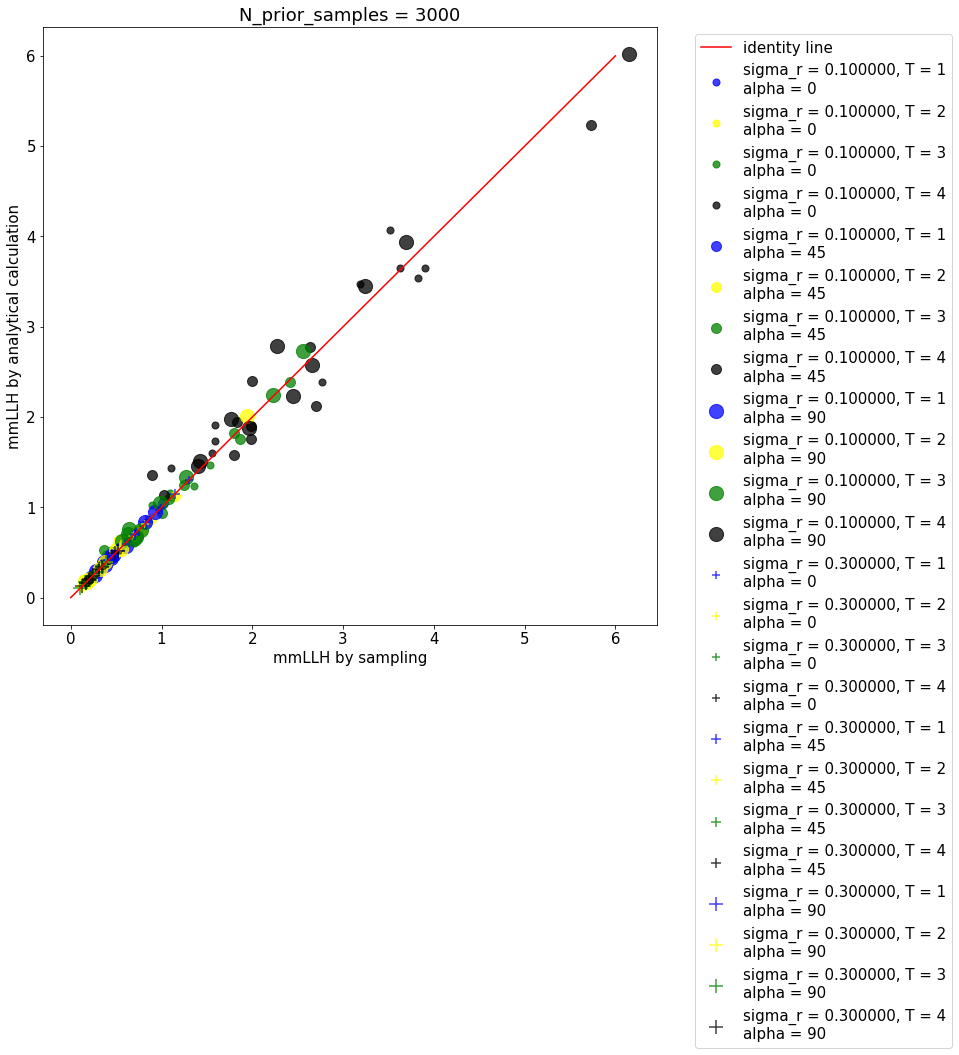

In [23]:
x = np.linspace(0, 6, 2000)
y = x
plt.plot(x, y, 'r-', label = 'identity line')
n = 10
colors = ['blue', 'yellow', 'green', 'black']
sizes = [50, 100, 200]
markers = ['o', '+']
for i, sigma in enumerate(sigma_reward_models):
  for j, alpha in enumerate(alphas):
    for k, T in enumerate(Ts):
      plt.scatter(values_from_sampling[i, j, k, :n], values_from_anal[i, j, k, :n], c = colors[k], label = 'sigma_r = %f, T = %d\nalpha = %d'%(sigma, T, alpha), s = sizes[j], marker=markers[i], alpha = .75)
      
plt.title('N_prior_samples = %d'%(N_prior_samples))
plt.xlabel('mmLLH by sampling')
plt.ylabel('mmLLH by analytical calculation')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('validation_anal_vs_sampling.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [20]:
values_from_sampling[0, 0, 3, :10]

array([3.90669508, 1.59232877, 3.51225049, 3.82851478, 1.56130871,
       1.58444048, 3.18304726, 3.62210003, 2.76861113, 1.10833436])